In [56]:
import pandas as pd
import os

os.chdir('C:\\Users\\Shubham\\Downloads\\datasets\\archive (9)')
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
features = df[columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = columns)
scaled_features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [4]:
gender=df['Gender']
df1=scaled_features.join(gender)
df1['Gender']=df1['Gender'].map({'Male':0,'Female':1})

In [5]:
df1

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,0


In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='Gender', ylabel='count'>

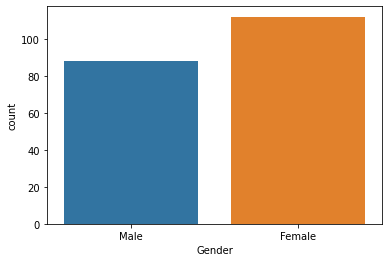

In [8]:
sns.countplot(x=df['Gender'],data=df)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

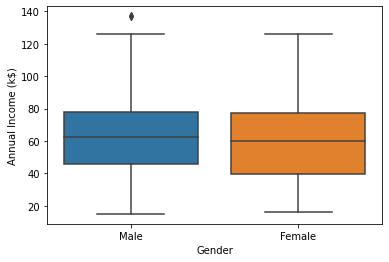

In [9]:
sns.boxplot(y=df['Annual Income (k$)'],x=df['Gender'],data=df)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

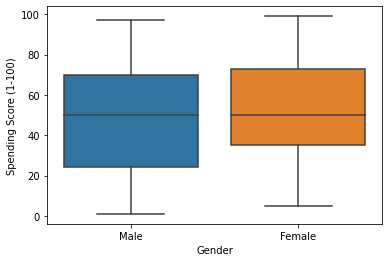

In [10]:
sns.boxplot(y=df['Spending Score (1-100)'],x=df['Gender'],data=df)

In [11]:
f1=pd.qcut(df['Age'],5,labels=['0-20%','20-40%','40-60%','60-80%','80-100%'])

In [12]:
f1.unique()

['0-20%', '20-40%', '40-60%', '80-100%', '60-80%']
Categories (5, object): ['0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
def ageit(age):
    if age<26 and age>18:
        return "18 to 25"
    elif age>26 and age<36:
        return "26 to 36"
    elif age>36 and age<45:
        return "36 to 45"
    elif age>45 and age<55:
        return "45 to 55"
    else:
        return "greater than 55"
        

In [15]:
df['Age']=df['Age'].apply(lambda x: ageit(x))

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,18 to 25,15,39
1,2,Male,18 to 25,15,81
2,3,Female,18 to 25,16,6
3,4,Female,18 to 25,16,77
4,5,Female,26 to 36,17,40
...,...,...,...,...,...
195,196,Female,26 to 36,120,79
196,197,Female,greater than 55,126,28
197,198,Male,26 to 36,126,74
198,199,Male,26 to 36,137,18


<AxesSubplot:xlabel='Age', ylabel='count'>

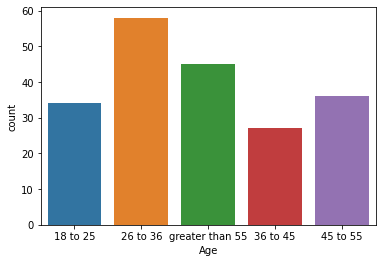

In [17]:
sns.countplot(x=df['Age'],data=df)

In [18]:
df['Age'].value_counts()

26 to 36           58
greater than 55    45
45 to 55           36
18 to 25           34
36 to 45           27
Name: Age, dtype: int64

In [19]:
def annual_income(income):
    if income<30 and income>0:
        return "0 to 30K"
    elif income>30 and income<60:
        return "30k to 60k"
    elif income>60 and income<90:
        return "60k to 90k"
    elif income>90 and income<120:
        return "90k to 120k"
    else:
        return "120k to 150k"

In [20]:
df['Annual Income (k$)']=df['Annual Income (k$)'].apply(lambda x: annual_income(x))

In [21]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,18 to 25,0 to 30K,39
1,2,Male,18 to 25,0 to 30K,81
2,3,Female,18 to 25,0 to 30K,6
3,4,Female,18 to 25,0 to 30K,77
4,5,Female,26 to 36,0 to 30K,40
...,...,...,...,...,...
195,196,Female,26 to 36,120k to 150k,79
196,197,Female,greater than 55,120k to 150k,28
197,198,Male,26 to 36,120k to 150k,74
198,199,Male,26 to 36,120k to 150k,18


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,18 to 25,0 to 30K,39
1,2,Male,18 to 25,0 to 30K,81
2,3,Female,18 to 25,0 to 30K,6
3,4,Female,18 to 25,0 to 30K,77
4,5,Female,26 to 36,0 to 30K,40
...,...,...,...,...,...
195,196,Female,26 to 36,120k to 150k,79
196,197,Female,greater than 55,120k to 150k,28
197,198,Male,26 to 36,120k to 150k,74
198,199,Male,26 to 36,120k to 150k,18


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

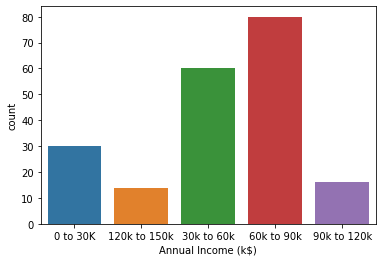

In [23]:
sns.countplot(x=df['Annual Income (k$)'],data=df)

In [24]:
df1

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,0


C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will 

Text(0, 0.5, 'Inertia')

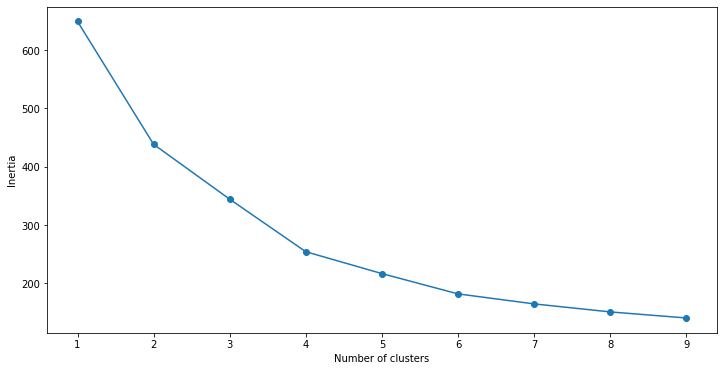

In [25]:
x = []

for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(df1)
    x.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':x})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [26]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.35027020434653977


C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [27]:
# silhouette score is 0.35

In [28]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.34977050035201074


C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [29]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.31384595454509323


C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [30]:
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.356485834425401


C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


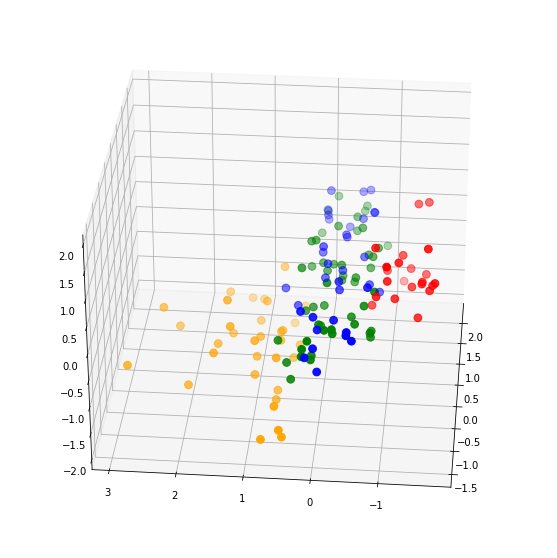

In [41]:
clusters = kmeans.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='blue', s=60)

ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='green', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [33]:
df1

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,0


In [38]:
from mpl_toolkits.mplot3d import Axes3D

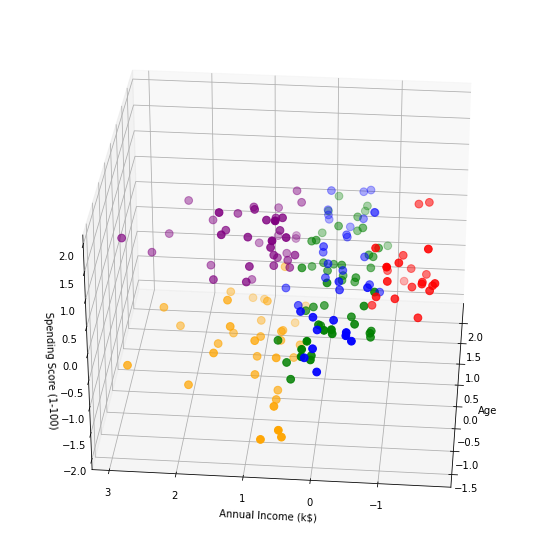

In [43]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df1.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='green', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='orange', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

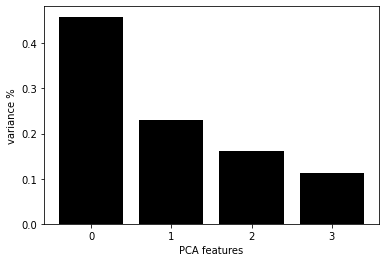

In [45]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df1)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


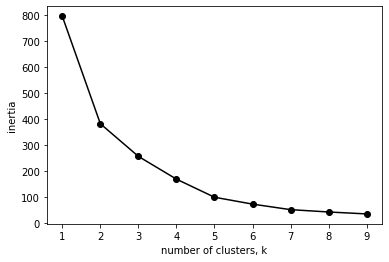

In [46]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [47]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

0.5056996842612647


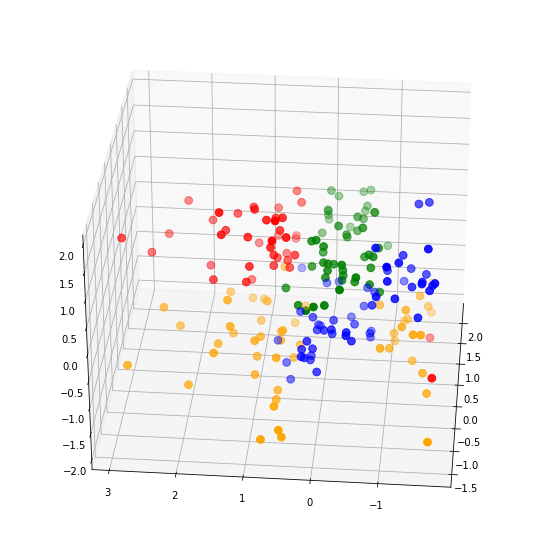

In [51]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
df1["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='green', s=60)

ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [57]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [58]:
df.drop('CustomerID',axis=1,inplace=True)

In [59]:
pred=model.predict(PCA_components.iloc[:,:2])
frame=pd.DataFrame(df)
df['cluster']=pred
frame

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [61]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,25.464286,44.178571,61.482143
1,1,32.317073,83.097561,80.048780
2,2,54.392157,54.803922,48.039216
3,3,43.173077,66.076923,16.634615


<AxesSubplot:xlabel='cluster', ylabel='Age'>

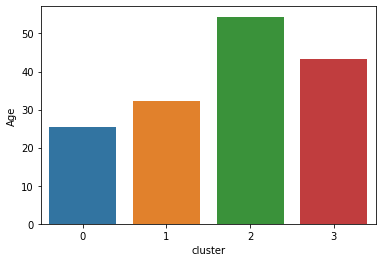

In [63]:
sns.barplot(x='cluster',y='Age',data=avg_df)


<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

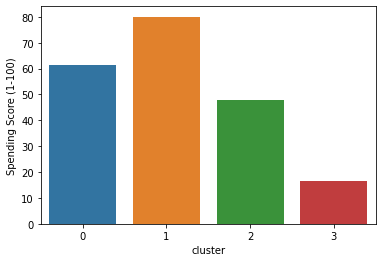

In [64]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)


<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

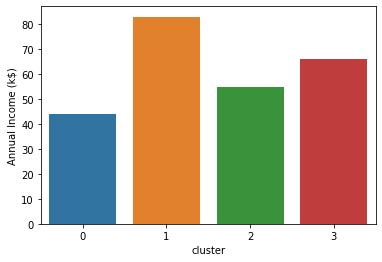

In [65]:

sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [67]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2

Gender
cluster Gender        
0       Female      35
        Male        21
1       Female      22
        Male        19
2       Female      28
        Male        23
3       Female      27
        Male        25